In [1]:
import IPython.display as ipd
ipd.Audio('C:/Users/acer pc/Desktop/VideoAds/train/Train/1.wav')

In [2]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

In [ ]:
#data, sampling_rate = librosa.load('C:/Users/asd/Desktop/18.wav')

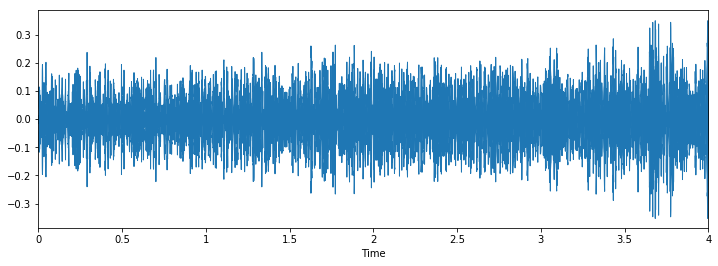

In [4]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [8]:
pathBase='C:/Users/acer pc/Desktop/VideoAds/train/'

In [9]:
trainn=pd.read_csv(pathBase +'train.csv')
print(trainn)

        ID             Class
0        0             siren
1        1      street_music
2        2          drilling
3        3             siren
4        4          dog_bark
5        6  children_playing
6       10      street_music
7       11          drilling
8       12          gun_shot
9       15          dog_bark
10      17     engine_idling
11      18             siren
12      19          gun_shot
13      20     engine_idling
14      22   air_conditioner
15      24   air_conditioner
16      26     engine_idling
17      27             siren
18      32  children_playing
19      33        jackhammer
20      35          gun_shot
21      36             siren
22      37        jackhammer
23      38      street_music
24      40        jackhammer
25      42     engine_idling
26      43             siren
27      44  children_playing
28      45        jackhammer
29      46     engine_idling
...    ...               ...
5405  8691      street_music
5406  8693          car_horn
5407  8694    

In [10]:
test = pd.read_csv(pathBase+'train.csv')
test['Class'] = 'jackhammer'
test.to_csv(pathBase+'sub01.csv', index=False)

In [11]:
trainn.Class.value_counts()

jackhammer          668
engine_idling       624
siren               607
air_conditioner     600
dog_bark            600
street_music        600
drilling            600
children_playing    600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [12]:
len(trainn.ID)

5435

In [13]:
trainData=np.asarray(trainn.ID)
print(trainData)
trainLabelDash=np.asarray(trainn.Class)
print(trainLabelDash)

[   0    1    2 ..., 8727 8728 8729]
['siren' 'street_music' 'drilling' ..., 'engine_idling' 'engine_idling'
 'air_conditioner']


In [14]:
trainLabell=[0 for x in range(5435)]
for i in range (len(trainLabelDash)):
    if trainLabelDash[i]=='jackhammer':
        trainLabell[i]=0
    elif trainLabelDash[i]=='engine_idling':
        trainLabell[i]=1
    elif trainLabelDash[i]=='siren':
        trainLabell[i]=2
    elif trainLabelDash[i]=='dog_bark':
        trainLabell[i]=3
    elif trainLabelDash[i]=='drilling':
        trainLabell[i]=4
    elif trainLabelDash[i]=='children_playing':
        trainLabell[i]=5
    elif trainLabelDash[i]=='air_conditioner':
        trainLabell[i]=6
    elif trainLabelDash[i]=='street_music':
        trainLabell[i]=7
    elif trainLabelDash[i]=='car_horn':
        trainLabell[i]=8
    elif trainLabelDash[i]=='gun_shot':
        trainLabell[i]=9

In [15]:
print(len(trainLabell))
#print(trainLabell)
print(trainLabell[0])
print(max(trainLabell))


5435
2
9


In [16]:
trainLabel = np.zeros((len(trainLabell), max(trainLabell)+1))
trainLabel[np.arange(len(trainLabell)),trainLabell] = 1
print(trainLabel)

[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [ ]:
def parser(row):
    # function to load files and extract features
    #print(row)
    file_name = os.path.join(pathBase, 'Train', str(row.ID) + '.wav')
    # handle exception to check if there isn't a file which is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # we extract mfcc feature from data
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None
    feature = mfccs
    label = row.Class
    return [feature, label]
temp = trainn.apply(parser, axis=1)
temp.columns = ['feature', 'label']

#Another way to evaluate accuracy

In [17]:
import pickle
with open('file3.txt', 'rb') as f:
   temp = pickle.load(f)

In [18]:
X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

In [19]:
print(X.shape)
print(y.shape)

(5435, 40)
(5435,)


In [20]:
for i in range(len(y)):
    if trainLabelDash[i]!=y[i]:
        print("error")

In [21]:
lb = LabelEncoder()
oneHot = np_utils.to_categorical(lb.fit_transform(y))

In [22]:
huhu=0
for i in range(5435):
    if oneHot[i].all()!=trainLabel[i].all():
        huhu=huhu+1   
print(huhu)

0


In [23]:
num_labels = trainLabel.shape[1]
print(num_labels)

10


In [24]:
filter_size = 2

In [25]:
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X, trainLabel, batch_size=32, epochs=50)

Epoch 1/50
5435/5435 [==============================] - 3s 603us/step - loss: 12.2429 - acc: 0.1746
Epoch 2/50
5435/5435 [==============================] - 1s 178us/step - loss: 10.1543 - acc: 0.2585
Epoch 3/50
5435/5435 [==============================] - 1s 206us/step - loss: 4.7104 - acc: 0.3299
Epoch 4/50
5435/5435 [==============================] - 1s 181us/step - loss: 2.0270 - acc: 0.3626
Epoch 5/50
5435/5435 [==============================] - 1s 175us/step - loss: 1.6950 - acc: 0.4401
Epoch 6/50
5435/5435 [==============================] - 1s 182us/step - loss: 1.5506 - acc: 0.4894
Epoch 7/50
5435/5435 [==============================] - 1s 178us/step - loss: 1.4067 - acc: 0.5270
Epoch 8/50
5435/5435 [==============================] - 1s 178us/step - loss: 1.3131 - acc: 0.5529
Epoch 9/50
5435/5435 [==============================] - 1s 181us/step - loss: 1.2609 - acc: 0.5722
Epoch 10/50
5435/5435 [==============================] - 1s 178us/step - loss: 1.1873 - acc: 0.6013
Epoch 1